In [10]:
# インストール（ColabやJupyterで実行する場合）
%pip install pytrends

import pandas as pd
import time
from datetime import datetime
from pytrends.request import TrendReq

# pytrendsの初期化（日本語、JST）
pytrends = TrendReq(hl='ja-JP', tz=540)

# 取得したいキーワード（例：古着に関連したブランド・カテゴリ・流行語など）
keywords = [
    '古着 セーター',
    '古着 ダウン',
    '古着 MA-1',
    'Levi\'s',
    'Y2K ファッション'
]

# トレンドの取得期間（2021年から今日まで）
today = datetime.today().strftime('%Y-%m-%d')
timeframe = f'2021-01-01 {today}'

# トレンドデータを保存するDataFrame
trend_df = pd.DataFrame()

# リトライ機能付き関数
def get_interest_over_time_with_retry(pytrends, retries=5, sleep_time=60):
    for i in range(retries):
        try:
            data = pytrends.interest_over_time()
            return data
        except Exception as e:
            print(f"[{i+1}/{retries}] エラー発生: {e}")
            print(f"{sleep_time}秒待機して再試行します...")
            time.sleep(sleep_time)
    raise Exception("interest_over_time の取得に失敗しました。")

# キーワードごとに1つずつトレンドを取得
for kw in keywords:
    print(f"【取得中】{kw}")
    try:
        pytrends.build_payload([kw], cat=0, timeframe=timeframe, geo='JP')
        time.sleep(10)  # アクセス間隔をあける（429回避）

        data = get_interest_over_time_with_retry(pytrends)

        # トレンドデータ取得後の処理
        if data is not None and not data.empty:
            # カラム名を安全に変換
            safe_col_name = kw.replace(" ", "_").replace("'", "")
            df = data.reset_index()[['date', kw]]
            df = df.rename(columns={kw: f"trend_{safe_col_name}"})

            # 日付で結合
            if trend_df.empty:
                trend_df = df
            else:
                trend_df = pd.merge(trend_df, df, on='date', how='outer')
    except Exception as e:
        print(f"❌ {kw} の取得に失敗: {e}")

# 欠損値を0で補完（または適宜処理）
trend_df = trend_df.fillna(0)

# 結果の表示（必要ならCSV保存も）
print(trend_df.head())

# CSVとして保存したい場合（任意）
# trend_df.to_csv('google_trends_features.csv', index=False)


Note: you may need to restart the kernel to use updated packages.
【取得中】古着 セーター
[1/5] エラー発生: The request failed: Google returned a response with code 429
60秒待機して再試行します...


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


【取得中】古着 ダウン


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


【取得中】古着 MA-1


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


【取得中】Levi's
[1/5] エラー発生: The request failed: Google returned a response with code 429
60秒待機して再試行します...


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


【取得中】Y2K ファッション
        date  trend_古着_セーター  trend_古着_ダウン  trend_古着_MA-1  trend_Levis  \
0 2020-12-27             78            69              0           51   
1 2021-01-03              0            55              0           52   
2 2021-01-10             40            51              0           59   
3 2021-01-17             51            47              0           77   
4 2021-01-24             42            30              0           78   

   trend_Y2K_ファッション  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


Font file not found at /usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf. Using default font.


/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 38306 (\N{CJK UNIFIED IDEOGRAPH-95A2}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 24515 (\N{CJK UNIFIED IDEOGRAPH-5FC3}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/2953210848.py:30: UserWarning: Glyph 24230 (\N{CJK UNIFIED IDEOGRAPH-5EA6}

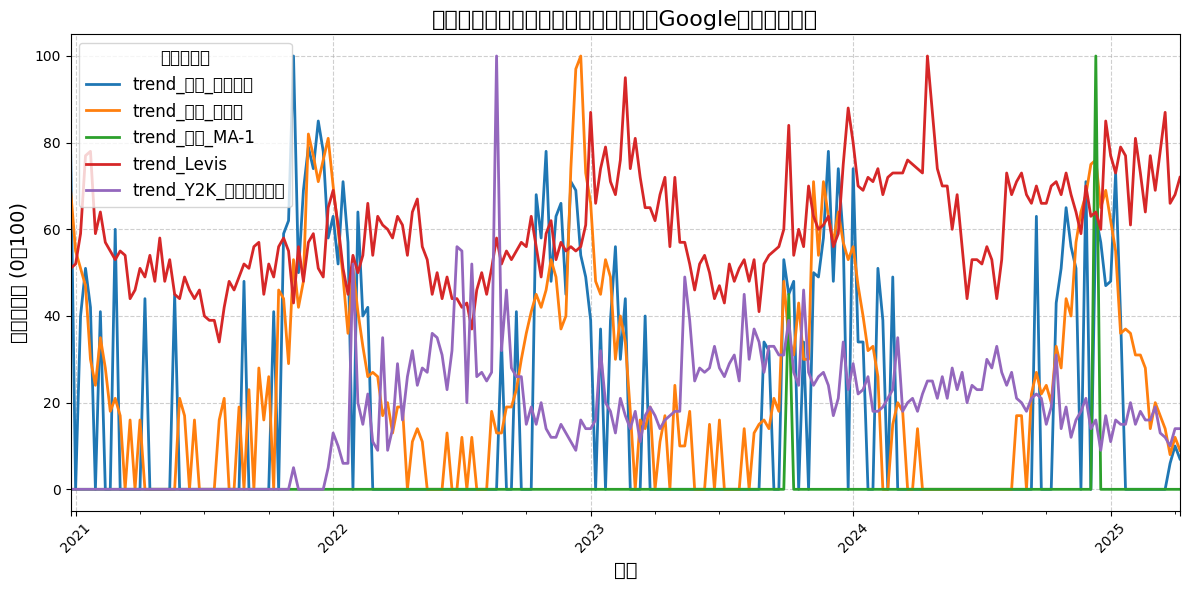

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# フォントファイルのパス（環境に合わせて調整）
font_path = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'

try:
    # フォントを登録
    fm.fontManager.addfont(font_path)
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
except FileNotFoundError:
    print(f"Font file not found at {font_path}. Using default font.")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# trend_df をプロット対象の DataFrame に設定
data = trend_df.copy()
data.set_index("date", inplace=True)

# プロット
data.plot(figsize=(12, 6), linewidth=2)
plt.title("ファッション・古着関連キーワードのGoogle検索トレンド", fontsize=16)
plt.xlabel("日付", fontsize=14)
plt.ylabel("検索関心度 (0〜100)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="キーワード", fontsize=12, title_fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

❌ 日本語フォントが見つかりません。デフォルトフォントを使用します。
【取得中】古着 セーター


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


【取得中】古着 ダウン


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


【取得中】古着 MA-1


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


【取得中】Levi's


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


【取得中】Y2K ファッション


/usr/local/lib/python3.10/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)
/tmp/ipykernel_2119/3355960535.py:106: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/3355960535.py:106: UserWarning: Glyph 20184 (\N{CJK UNIFIED IDEOGRAPH-4ED8}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/3355960535.py:106: UserWarning: Glyph 26908 (\N{CJK UNIFIED IDEOGRAPH-691C}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/3355960535.py:106: UserWarning: Glyph 32034 (\N{CJK UNIFIED IDEOGRAPH-7D22}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_2119/3355960535.py:106: 

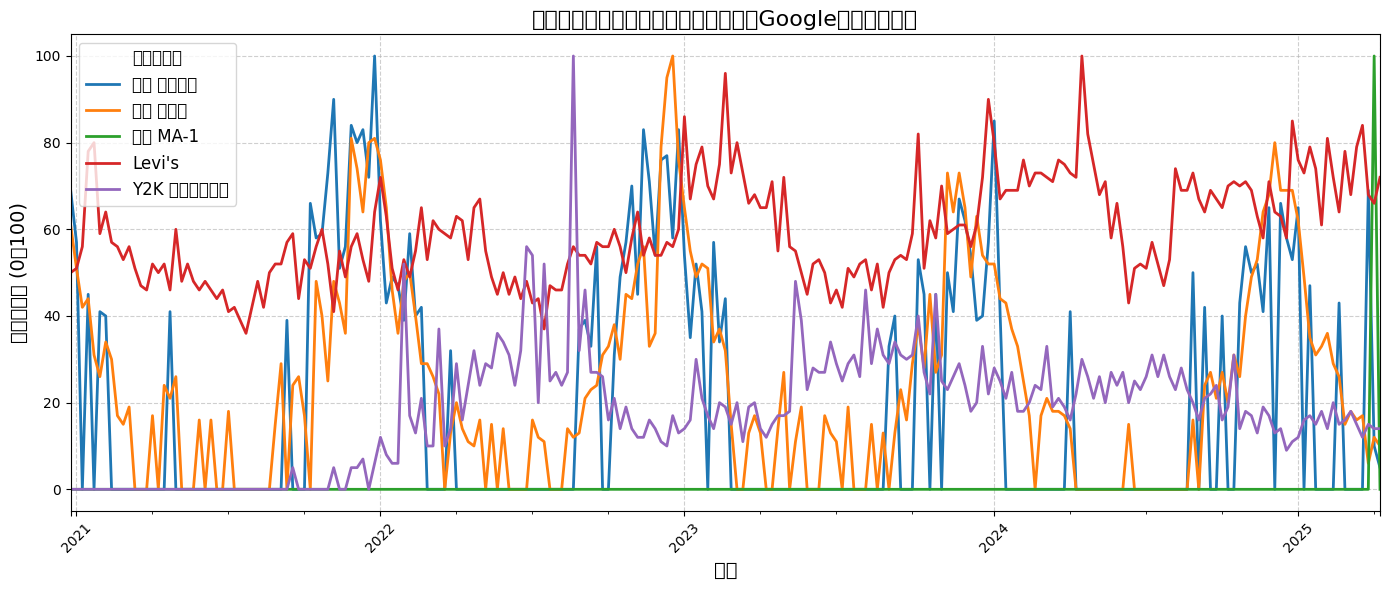

In [15]:
import pandas as pd
import time
from datetime import datetime
from pytrends.request import TrendReq
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import os

# ▼ フォント設定（日本語対応フォントを明示的に設定）
font_path = '/usr/share/fonts/truetype/ipafont/ipagp.ttf'  # IPAゴシック（aptでインストール可能）

if os.path.exists(font_path):
    fm.fontManager.addfont(font_path)
    font_prop = fm.FontProperties(fname=font_path)
    plt.rcParams['font.family'] = font_prop.get_name()
else:
    print("❌ 日本語フォントが見つかりません。デフォルトフォントを使用します。")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['axes.unicode_minus'] = False

# ▼ Googleトレンド設定
pytrends = TrendReq(hl='ja-JP', tz=540)

keywords = [
    '古着 セーター',
    '古着 ダウン',
    '古着 MA-1',
    'Levi\'s',
    'Y2K ファッション'
]

# 列名マッピング
keyword_map = {
    '古着 セーター': 'furugi_sweater',
    '古着 ダウン': 'furugi_down',
    '古着 MA-1': 'furugi_ma1',
    "Levi's": 'levis',
    'Y2K ファッション': 'y2k_fashion'
}

label_map = {
    'trend_furugi_sweater': '古着 セーター',
    'trend_furugi_down': '古着 ダウン',
    'trend_furugi_ma1': '古着 MA-1',
    'trend_levis': "Levi's",
    'trend_y2k_fashion': 'Y2K ファッション'
}

# ▼ 期間設定
today = datetime.today().strftime('%Y-%m-%d')
timeframe = f'2021-01-01 {today}'

# ▼ リトライ付き取得関数
def get_interest_over_time_with_retry(pytrends, retries=5, sleep_time=60):
    for i in range(retries):
        try:
            data = pytrends.interest_over_time()
            return data
        except Exception as e:
            print(f"[{i+1}/{retries}] エラー発生: {e}")
            time.sleep(sleep_time)
    raise Exception("interest_over_time の取得に失敗しました。")

# ▼ トレンドデータ収集
trend_df = pd.DataFrame()

for kw in keywords:
    print(f"【取得中】{kw}")
    try:
        pytrends.build_payload([kw], cat=0, timeframe=timeframe, geo='JP')
        time.sleep(10)  # API制限対策

        data = get_interest_over_time_with_retry(pytrends)

        if data is not None and not data.empty:
            safe_col_name = keyword_map.get(kw, kw.replace(" ", "_").replace("'", ""))
            df = data.reset_index()[['date', kw]]
            df = df.rename(columns={kw: f"trend_{safe_col_name}"})

            if trend_df.empty:
                trend_df = df
            else:
                trend_df = pd.merge(trend_df, df, on='date', how='outer')

    except Exception as e:
        print(f"❌ {kw} の取得に失敗: {e}")

# 欠損を補完
trend_df = trend_df.fillna(0)

# ▼ グラフ描画
data = trend_df.copy()
data.set_index("date", inplace=True)

ax = data.plot(figsize=(14, 6), linewidth=2)
for line, label in zip(ax.lines, data.columns):
    line.set_label(label_map.get(label, label))

plt.title("ファッション・古着関連キーワードのGoogle検索トレンド", fontsize=16)
plt.xlabel("日付", fontsize=14)
plt.ylabel("検索関心度 (0〜100)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="キーワード", fontsize=12, title_fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ▼ 必要ならCSV保存（任意）
trend_df.to_csv('google_trends_features.csv', index=False, encoding='utf-8-sig')


In [ ]:
from pytrends.request import TrendReq
from datetime import datetime, timedelta
import pandas as pd
import time
import os

# ▼ 設定
pytrends = TrendReq(hl='ja-JP', tz=540)
keywords = [
    '古着 セーター',
    '古着 ダウン',
    '古着 MA-1',
    "Levi's",
    'Y2K ファッション'
]
keyword_map = {
    '古着 セーター': 'furugi_sweater',
    '古着 ダウン': 'furugi_down',
    '古着 MA-1': 'furugi_ma1',
    "Levi's": 'levis',
    'Y2K ファッション': 'y2k_fashion'
}

# ▼ 補正付き取得関数（リトライ付き）
def get_corrected_trend(pytrends, kw, start_date, end_date, retries=3, step_days=89):
    current_start = start_date
    segments = []

    while current_start < end_date:
        for attempt in range(retries):
            try:
                current_end = min(current_start + timedelta(days=step_days), end_date)
                timeframe = f"{current_start.strftime('%Y-%m-%d')} {current_end.strftime('%Y-%m-%d')}"
                pytrends.build_payload([kw], cat=0, timeframe=timeframe, geo='JP')
                data = pytrends.interest_over_time().reset_index()
                if not data.empty:
                    segments.append(data[['date', kw]])
                time.sleep(2)  # 念のため軽く休む
                break
            except Exception as e:
                print(f"[{kw}] リクエスト失敗: {e}")
                wait_time = 60 * (attempt + 1)
                print(f"{wait_time}秒待ってリトライします...")
                time.sleep(wait_time)
        current_start = current_end - timedelta(days=1)

    if not segments:
        raise Exception(f"[{kw}] データが取得できませんでした。")

    # 補正処理
    base = segments[0].copy()
    merged = base.copy()
    for i in range(1, len(segments)):
        prev = merged
        curr = segments[i]

        overlap = pd.merge(prev, curr, on='date', suffixes=('_prev', '_curr'))
        if not overlap.empty:
            prev_val = overlap[f'{kw}_prev'].iloc[0]
            curr_val = overlap[f'{kw}_curr'].iloc[0]
            scale = prev_val / curr_val if curr_val != 0 else 1.0
        else:
            scale = 1.0

        curr[kw] = curr[kw] * scale
        curr = curr[~curr['date'].isin(prev['date'])]
        merged = pd.concat([merged, curr], ignore_index=True)

    return merged

# ▼ 実行：2021年〜今日まで
start_date = datetime(2021, 1, 1)
end_date = datetime.today()

output_dir = "trends_output"
os.makedirs(output_dir, exist_ok=True)

for kw in keywords:
    safe_col = keyword_map[kw]
    out_path = os.path.join(output_dir, f"trend_{safe_col}.csv")
    if os.path.exists(out_path):
        print(f"✅ {kw}（{safe_col}）は既に取得済み。スキップ。")
        continue

    print(f"🔍 取得中: {kw}")
    try:
        df = get_corrected_trend(pytrends, kw, start_date, end_date)
        df = df.rename(columns={kw: f"trend_{safe_col}"})
        df.to_csv(out_path, index=False, encoding='utf-8-sig')
        print(f"✅ {kw} を保存しました → {out_path}")
    except Exception as e:
        print(f"❌ {kw} の取得に失敗しました: {e}")

    
    print("⏳ 次のリクエストまで90秒待機...\n")
    time.sleep(90)
